## Analysis of Goodreads Data up to 2025

In [1]:
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
my_cols = ['review_id',	'user_id',	'work_id',	'date_added',	'rating',	'n_votes',	'n_comments']


In [3]:
reviews = pd.read_csv(r'C:\Users\conif\Documents\Projects\Maven\Goodreads-Project\Goodreads+Book+Reviews\Goodreads_Reviews.csv',
                 usecols=my_cols, parse_dates=[	'date_added'], low_memory=False)

In [4]:
reviews.head()

,review_id,user_id,work_id,date_added,rating,n_votes,n_comments
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0
1,de0f7c8d15e247443e51969becf2878e,3693bb4f1062b659a354848cf11ca313,3270810,2013-12-21,5.0,0,0
2,e79b49504ef58b2defcdc8b79e2ec3fb,3693bb4f1062b659a354848cf11ca313,4768235,2013-12-19,5.0,0,0
3,495c1210a9dbd819cbf7717dfb8b217f,3693bb4f1062b659a354848cf11ca313,6264661,2013-12-16,5.0,0,0
4,54fcd8963c9dd56485d2a4ad152699c2,3693bb4f1062b659a354848cf11ca313,3429537,2013-12-16,5.0,0,0


In [5]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143887 entries, 0 to 1143886
Data columns (total 7 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   review_id   1143887 non-null  object        
 1   user_id     1143887 non-null  object        
 2   work_id     1143887 non-null  int64         
 3   date_added  1143887 non-null  datetime64[ns]
 4   rating      1106569 non-null  float64       
 5   n_votes     1143887 non-null  int64         
 6   n_comments  1143887 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 61.1+ MB


In [6]:
reviews


,review_id,user_id,work_id,date_added,rating,n_votes,n_comments
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0
1,de0f7c8d15e247443e51969becf2878e,3693bb4f1062b659a354848cf11ca313,3270810,2013-12-21,5.0,0,0
2,e79b49504ef58b2defcdc8b79e2ec3fb,3693bb4f1062b659a354848cf11ca313,4768235,2013-12-19,5.0,0,0
3,495c1210a9dbd819cbf7717dfb8b217f,3693bb4f1062b659a354848cf11ca313,6264661,2013-12-16,5.0,0,0
4,54fcd8963c9dd56485d2a4ad152699c2,3693bb4f1062b659a354848cf11ca313,3429537,2013-12-16,5.0,0,0
...,...,...,...,...,...,...,...
1143882,8e05cab599f02b37f91f8ed28f9f48e4,e0e7c5393a2804aebd3ff8ee6ccda68b,886727,2009-06-11,NaN,0,1
1143883,be748fd3fb45861b63c42c118537e42e,65ae53f875cbef5316cae62df0ace7a7,194190,2008-12-04,NaN,0,1
1143884,ba7ab4d68247157ae37207e0a06336ea,65ae53f875cbef5316cae62df0ace7a7,1643555,2008-04-24,NaN,0,1
1143885,51daa24b2029d918c3fa3fa964c1e032,7ad0f8d6450f143ecf8ee00e2af59a38,2609827,2014-09-08,NaN,0,1


In [7]:
works = pd.read_csv(r'C:\Users\conif\Documents\Projects\Maven\Goodreads-Project\Goodreads+Book+Reviews\goodreads_works.csv')

In [8]:
works.head()

,work_id,isbn,isbn13,original_title,author,original_publication_year,num_pages,description,genres,image_url,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating,similar_books
0,2919130,1416534601,9.781417e+12,Nocturnes,John Connolly,2004.0,NaN,NaN,"fiction, fantasy, paranormal, mystery, thrille...",https://s.gr-assets.com/assets/nophoto/book/11...,8820,338,1118,1601,1029,190,58,3996,3.9,NaN
1,52087333,NaN,NaN,Draw Play,Tia Lewis,2016.0,NaN,Jake:\nI can't believe my coach assigned me a ...,"romance, fiction",https://s.gr-assets.com/assets/nophoto/book/11...,2482,204,204,353,274,77,29,937,3.7,NaN
2,1649583,1416505520,9.781417e+12,Citizen of the Galaxy,Robert A. Heinlein,1957.0,NaN,"In a distant galaxy, the atrocity of slavery w...","fiction, young-adult, fantasy, paranormal, chi...",https://s.gr-assets.com/assets/nophoto/book/11...,16506,447,3539,4351,2863,444,53,11250,4.0,NaN
3,688299,0060541830,9.780061e+12,Congo,Michael Crichton,1980.0,NaN,"Deep in the African rain forest, near the lege...","fiction, mystery, thriller, crime, fantasy, pa...",https://s.gr-assets.com/assets/nophoto/book/11...,170916,1633,25081,45775,48505,14001,2926,136288,3.6,NaN
4,3464264,0451528824,9.780452e+12,Anne of Green Gables,L.M. Montgomery,1908.0,NaN,"Everyone's favorite redhead, the spunky Anne S...","fiction, young-adult, children, history, histo...",https://s.gr-assets.com/assets/nophoto/book/11...,743392,14586,272952,161856,81578,19933,9099,545418,4.2,NaN


In [9]:
works

,work_id,isbn,isbn13,original_title,author,original_publication_year,num_pages,description,genres,image_url,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating,similar_books
0,2919130,1416534601,9.781417e+12,Nocturnes,John Connolly,2004.0,NaN,NaN,"fiction, fantasy, paranormal, mystery, thrille...",https://s.gr-assets.com/assets/nophoto/book/11...,8820,338,1118,1601,1029,190,58,3996,3.9,NaN
1,52087333,NaN,NaN,Draw Play,Tia Lewis,2016.0,NaN,Jake:\nI can't believe my coach assigned me a ...,"romance, fiction",https://s.gr-assets.com/assets/nophoto/book/11...,2482,204,204,353,274,77,29,937,3.7,NaN
2,1649583,1416505520,9.781417e+12,Citizen of the Galaxy,Robert A. Heinlein,1957.0,NaN,"In a distant galaxy, the atrocity of slavery w...","fiction, young-adult, fantasy, paranormal, chi...",https://s.gr-assets.com/assets/nophoto/book/11...,16506,447,3539,4351,2863,444,53,11250,4.0,NaN
3,688299,0060541830,9.780061e+12,Congo,Michael Crichton,1980.0,NaN,"Deep in the African rain forest, near the lege...","fiction, mystery, thriller, crime, fantasy, pa...",https://s.gr-assets.com/assets/nophoto/book/11...,170916,1633,25081,45775,48505,14001,2926,136288,3.6,NaN
4,3464264,0451528824,9.780452e+12,Anne of Green Gables,L.M. Montgomery,1908.0,NaN,"Everyone's favorite redhead, the spunky Anne S...","fiction, young-adult, children, history, histo...",https://s.gr-assets.com/assets/nophoto/book/11...,743392,14586,272952,161856,81578,19933,9099,545418,4.2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,54014359,NaN,NaN,The Billionaire Beast: A Billionaire Romance (...,Jackie Ashenden,2017.0,212.0,"Dark, tortured, and intimidating, these domina...","romance, fiction",https://images.gr-assets.com/books/1483314230m...,713,138,102,123,72,32,6,335,3.8,NaN
13521,55464075,NaN,NaN,Forever,Monica Murphy,2017.0,221.0,She's all I could ever want...\nI have a reput...,"romance, young-adult",https://images.gr-assets.com/books/1490712510m...,1881,129,170,184,128,25,11,518,3.9,NaN
13522,54275347,NaN,NaN,Most Valuable Playboy,Lauren Blakely,2017.0,300.0,"Hands down, my favorite thing in the world is ...","romance, fiction",https://images.gr-assets.com/books/1510251456m...,11073,453,1133,1109,451,88,30,2811,4.1,NaN
13523,56412634,NaN,NaN,The Bet (Player Series),Elizabeth Hayley,2017.0,274.0,"Jace ""the Jet"" Benning is a legend on the foot...","romance, fiction, young-adult",https://images.gr-assets.com/books/1494364595m...,334,64,24,42,26,10,5,107,3.7,NaN


In [10]:
works.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13525 entries, 0 to 13524
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   work_id                    13525 non-null  int64  
 1   isbn                       11474 non-null  object 
 2   isbn13                     11864 non-null  float64
 3   original_title             13525 non-null  object 
 4   author                     13525 non-null  object 
 5   original_publication_year  13507 non-null  float64
 6   num_pages                  12795 non-null  float64
 7   description                13356 non-null  object 
 8   genres                     13525 non-null  object 
 9   image_url                  13525 non-null  object 
 10  reviews_count              13525 non-null  int64  
 11  text_reviews_count         13525 non-null  int64  
 12  5_star_ratings             13525 non-null  int64  
 13  4_star_ratings             13525 non-null  int

In [11]:
works = works.drop(columns=['image_url', 'similar_books', 'description', 'isbn13' ])

In [12]:
works

,work_id,isbn,original_title,author,original_publication_year,num_pages,genres,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating
0,2919130,1416534601,Nocturnes,John Connolly,2004.0,NaN,"fiction, fantasy, paranormal, mystery, thrille...",8820,338,1118,1601,1029,190,58,3996,3.9
1,52087333,NaN,Draw Play,Tia Lewis,2016.0,NaN,"romance, fiction",2482,204,204,353,274,77,29,937,3.7
2,1649583,1416505520,Citizen of the Galaxy,Robert A. Heinlein,1957.0,NaN,"fiction, young-adult, fantasy, paranormal, chi...",16506,447,3539,4351,2863,444,53,11250,4.0
3,688299,0060541830,Congo,Michael Crichton,1980.0,NaN,"fiction, mystery, thriller, crime, fantasy, pa...",170916,1633,25081,45775,48505,14001,2926,136288,3.6
4,3464264,0451528824,Anne of Green Gables,L.M. Montgomery,1908.0,NaN,"fiction, young-adult, children, history, histo...",743392,14586,272952,161856,81578,19933,9099,545418,4.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13520,54014359,NaN,The Billionaire Beast: A Billionaire Romance (...,Jackie Ashenden,2017.0,212.0,"romance, fiction",713,138,102,123,72,32,6,335,3.8
13521,55464075,NaN,Forever,Monica Murphy,2017.0,221.0,"romance, young-adult",1881,129,170,184,128,25,11,518,3.9
13522,54275347,NaN,Most Valuable Playboy,Lauren Blakely,2017.0,300.0,"romance, fiction",11073,453,1133,1109,451,88,30,2811,4.1
13523,56412634,NaN,The Bet (Player Series),Elizabeth Hayley,2017.0,274.0,"romance, fiction, young-adult",334,64,24,42,26,10,5,107,3.7


In [13]:
# merge the two dataframes
reviews = reviews.merge(works, on='work_id', how='left')

In [14]:
reviews.head()

,review_id,user_id,work_id,date_added,rating,n_votes,n_comments,isbn,original_title,author,...,genres,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0,0803734611,Fire,Kristin Cashore,...,"fantasy, paranormal, young-adult, romance, fic...",226284,9277,58448,45909,23118,6135,2424,136034,4.1
1,de0f7c8d15e247443e51969becf2878e,3693bb4f1062b659a354848cf11ca313,3270810,2013-12-21,5.0,0,0,015206396X,Graceling,Kristin Cashore,...,"fantasy, paranormal, young-adult, romance, fic...",561638,19384,130120,102274,50154,14326,6972,303846,4.1
2,e79b49504ef58b2defcdc8b79e2ec3fb,3693bb4f1062b659a354848cf11ca313,4768235,2013-12-19,5.0,0,0,0425225771,"Would-Be Witch (Southern Witch, Book 1)",Kimberly Frost,...,"fantasy, paranormal, romance, fiction, mystery...",10310,396,1145,1430,1024,326,130,4055,3.8
3,495c1210a9dbd819cbf7717dfb8b217f,3693bb4f1062b659a354848cf11ca313,6264661,2013-12-16,5.0,0,0,1416963960,White Cat,Holly Black,...,"fantasy, paranormal, young-adult, mystery, thr...",94682,4042,9113,13019,8170,2274,948,33524,3.8
4,54fcd8963c9dd56485d2a4ad152699c2,3693bb4f1062b659a354848cf11ca313,3429537,2013-12-16,5.0,0,0,0152063846,Jessica's Guide to Dating on the Dark Side,Beth Fantaskey,...,"young-adult, romance, fantasy, paranormal, fic...",66598,2837,12251,11017,8612,2873,1162,35915,3.8


In [15]:
# explode genres
reviews['genres'] = reviews['genres'].str.split(',')
reviews = reviews.explode('genres')
reviews['genres'] = reviews['genres'].str.strip()


In [16]:
reviews.head()


,review_id,user_id,work_id,date_added,rating,n_votes,n_comments,isbn,original_title,author,...,genres,reviews_count,text_reviews_count,5_star_ratings,4_star_ratings,3_star_ratings,2_star_ratings,1_star_ratings,ratings_count,avg_rating
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0,0803734611,Fire,Kristin Cashore,...,fantasy,226284,9277,58448,45909,23118,6135,2424,136034,4.1
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0,0803734611,Fire,Kristin Cashore,...,paranormal,226284,9277,58448,45909,23118,6135,2424,136034,4.1
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0,0803734611,Fire,Kristin Cashore,...,young-adult,226284,9277,58448,45909,23118,6135,2424,136034,4.1
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0,0803734611,Fire,Kristin Cashore,...,romance,226284,9277,58448,45909,23118,6135,2424,136034,4.1
0,fa7a00c01296e3b2b2e857d79c51ea77,3693bb4f1062b659a354848cf11ca313,6128277,2013-12-21,5.0,0,0,0803734611,Fire,Kristin Cashore,...,fiction,226284,9277,58448,45909,23118,6135,2424,136034,4.1


In [17]:
# sort unique titles by number of five star reviews
five_star_books = reviews[['original_title', '5_star_ratings']].sort_values(by='5_star_ratings', ascending=False)

In [18]:
# get unique titles
unique_5_star_titles = five_star_books[['original_title', '5_star_ratings']].drop_duplicates().reset_index(drop=True)

In [19]:
unique_5_star_titles

,original_title,5_star_ratings
0,Harry Potter and the Philosopher's Stone,3131920
1,The Hunger Games,2768578
2,To Kill a Mockingbird,1748429
3,Twilight,1383583
4,The Fault in Our Stars,1351908
...,...,...
13519,Therian,11
13520,Dragons of Tomorrow,11
13521,The Goodreads Killer: A Revenge Fantasy,10
13522,Peregrine Harker & The Black Death,7


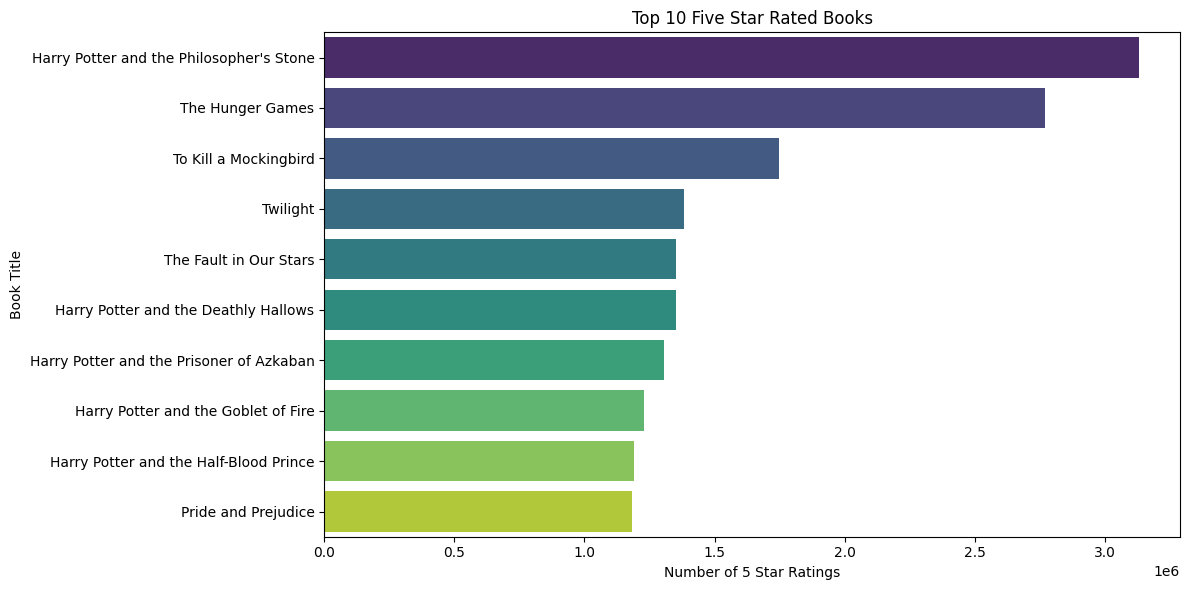

In [20]:
#plot bar chart of top 10 five star books
top_10_five_star_books = unique_5_star_titles.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x='5_star_ratings',
    y='original_title',
    data=top_10_five_star_books,
    palette='viridis',
    hue='original_title',
    legend=False
)
plt.title('Top 10 Five Star Rated Books')
plt.xlabel('Number of 5 Star Ratings')
plt.ylabel('Book Title')
plt.tight_layout()
plt.show()

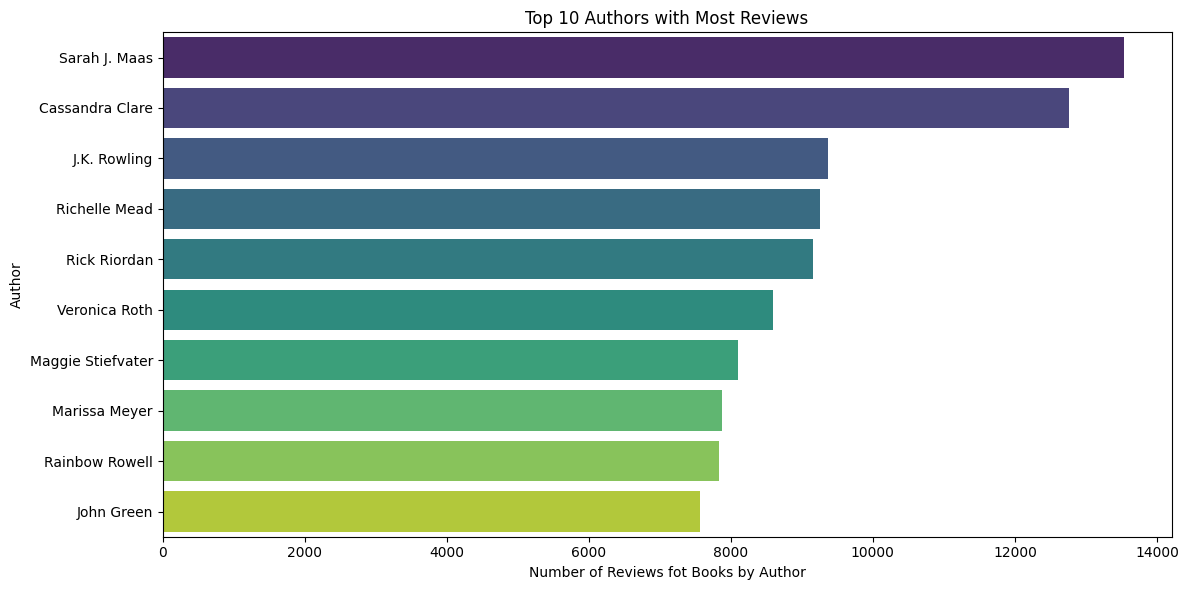

In [21]:
# authors with the most reviews
unique_reviews = reviews.drop_duplicates(subset='review_id')
top_authors = unique_reviews['author'].value_counts().head(10)
plt.figure(figsize=(12, 6)) 
sns.barplot(
    x=top_authors.values,
    y=top_authors.index,
    palette='viridis',
    hue=top_authors.index,
    legend=False
)
plt.title('Top 10 Authors with Most Reviews')
plt.xlabel('Number of Reviews fot Books by Author')
plt.ylabel('Author')
plt.tight_layout()
plt.show()


In [22]:
top_authors


author
Sarah J. Maas        13530
Cassandra Clare      12756
J.K. Rowling          9372
Richelle Mead         9256
Rick Riordan          9156
Veronica Roth         8601
Maggie Stiefvater     8101
Marissa Meyer         7872
Rainbow Rowell        7828
John Green            7573
Name: count, dtype: int64

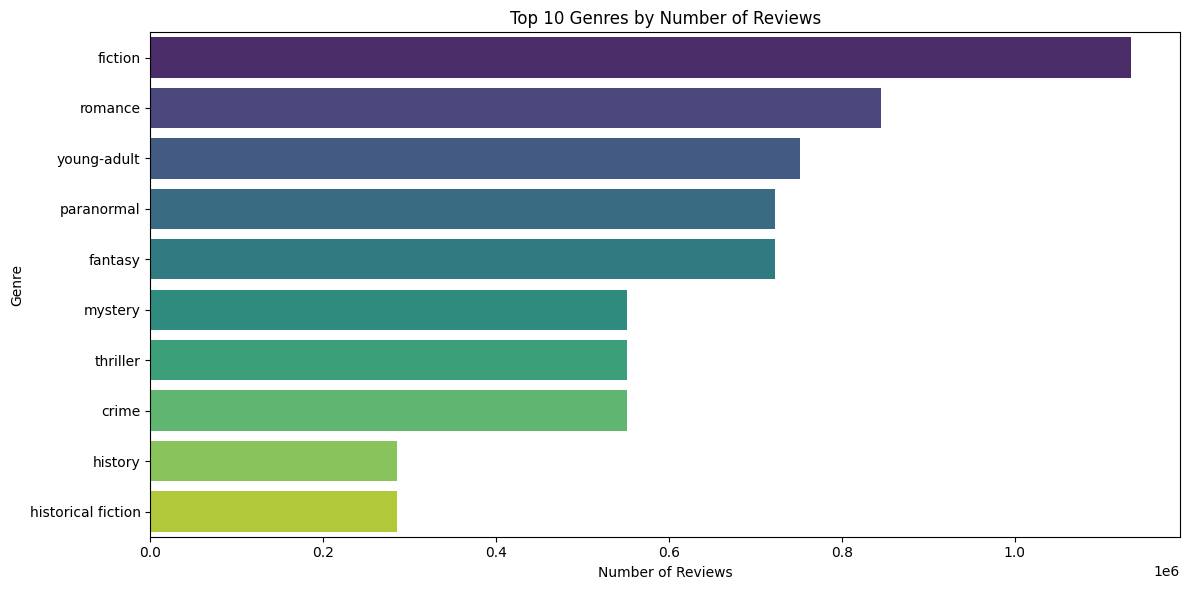

In [23]:
# most popular genres by number of reviews
# no need to drop duplicates here as genres are already exploded
top_genres = reviews['genres'].value_counts().head(10)
plt.figure(figsize=(12, 6))
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    palette='viridis',
    hue=top_genres.index,
    legend=False
)
plt.title('Top 10 Genres by Number of Reviews')
plt.xlabel('Number of Reviews')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()

In [24]:
# list books by Sarah J. Maas along with their ratings, and genres
sarah_j_maas_books = reviews[reviews['author'] == 'Sarah J. Maas'][['original_title', 'rating', 'genres']]
sarah_j_maas_books

,original_title,rating,genres
511,The Assassin and the Empire,5.0,fantasy
511,The Assassin and the Empire,5.0,paranormal
511,The Assassin and the Empire,5.0,young-adult
511,The Assassin and the Empire,5.0,romance
511,The Assassin and the Empire,5.0,fiction
...,...,...,...
1143805,A Court of Mist and Fury,NaN,fantasy
1143805,A Court of Mist and Fury,NaN,paranormal
1143805,A Court of Mist and Fury,NaN,romance
1143805,A Court of Mist and Fury,NaN,young-adult


In [27]:
# count the unique number of books by Sarah J. Maas
s_maas_num = sarah_j_maas_books['original_title'].nunique()
print(s_maas_num)

14
